In [24]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import csv
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns


In [25]:
df = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
testdf.shape

(380447, 23)

In [26]:
print('Nulls:')
print(df.isnull().sum())

Nulls:
acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64


In [27]:
print('Test Nulls:')
print(testdf.isnull().sum())

Test Nulls:
acqic           0
bacno           0
cano            0
conam           0
contp           0
csmcu           0
ecfg            0
etymd           0
flbmk        3176
flg_3dsmk    3176
fraud_ind       0
hcefg           0
insfg           0
iterm           0
locdt           0
loctm           0
mcc             0
mchno           0
ovrlt           0
scity           0
stocn           0
stscd           0
txkey           0
dtype: int64


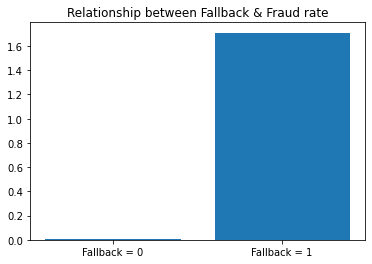

In [28]:
tb1, tb2 = df[df.flbmk == 'N'], df[df.flbmk == 'Y']
plt.title('Relationship between Fallback & Fraud rate')
plt.bar(['Fallback = 0', 'Fallback = 1'], 
         [round(len(100*tb1[tb1.fraud_ind==1])/len(tb1), 2), 
          round(100*len(tb2[tb2.fraud_ind==1])/len(tb2), 2)])
plt.show()

In [29]:
df=df.fillna('N')
testdf=testdf.fillna('N')

In [30]:
df

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,Y,8,N,N,...,0,4,191642.0,209,38222,N,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,Y,8,N,N,...,0,13,102338.0,192,90135,N,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,Y,8,N,N,...,0,29,234618.0,373,79246,N,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,Y,2,N,N,...,0,24,215218.0,373,79246,N,5817,102,0,338215


In [31]:
testdf

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
1,0,78377,2295,465.62,5,0,N,2,N,N,...,0,6,104918.0,451,0,N,5817,102,0,2943
2,0,151054,197751,465.62,5,0,N,2,N,N,...,0,7,104917.0,451,0,N,5817,102,0,3387
3,6716,150887,4541,930.31,5,62,N,4,N,N,...,0,8,142028.0,329,37560,N,5820,102,0,1765957
4,6882,110356,133430,0.00,5,0,N,0,N,N,...,0,9,143657.0,459,2461,N,0,102,0,611269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380442,5588,95249,112041,1.38,5,75,Y,8,N,N,...,0,17,194234.0,296,73998,N,3426,42,0,668463
380443,6215,85771,169553,609.21,5,75,Y,2,N,N,...,0,14,133907.0,289,54828,N,3460,46,0,1846986
380444,6231,139728,168027,574.36,5,75,N,5,N,N,...,0,28,155437.0,245,18405,N,5817,102,0,992751
380445,6032,45406,197460,1.38,5,75,Y,2,N,N,...,0,24,215218.0,373,79246,N,5817,102,0,338215


In [32]:
print('Nulls:')
print(df.isnull().sum())

Nulls:
acqic        0
bacno        0
cano         0
conam        0
contp        0
csmcu        0
ecfg         0
etymd        0
flbmk        0
flg_3dsmk    0
fraud_ind    0
hcefg        0
insfg        0
iterm        0
locdt        0
loctm        0
mcc          0
mchno        0
ovrlt        0
scity        0
stocn        0
stscd        0
txkey        0
dtype: int64


In [33]:
print('Test Nulls:')
print(testdf.isnull().sum())

Test Nulls:
acqic        0
bacno        0
cano         0
conam        0
contp        0
csmcu        0
ecfg         0
etymd        0
flbmk        0
flg_3dsmk    0
fraud_ind    0
hcefg        0
insfg        0
iterm        0
locdt        0
loctm        0
mcc          0
mchno        0
ovrlt        0
scity        0
stocn        0
stscd        0
txkey        0
dtype: int64


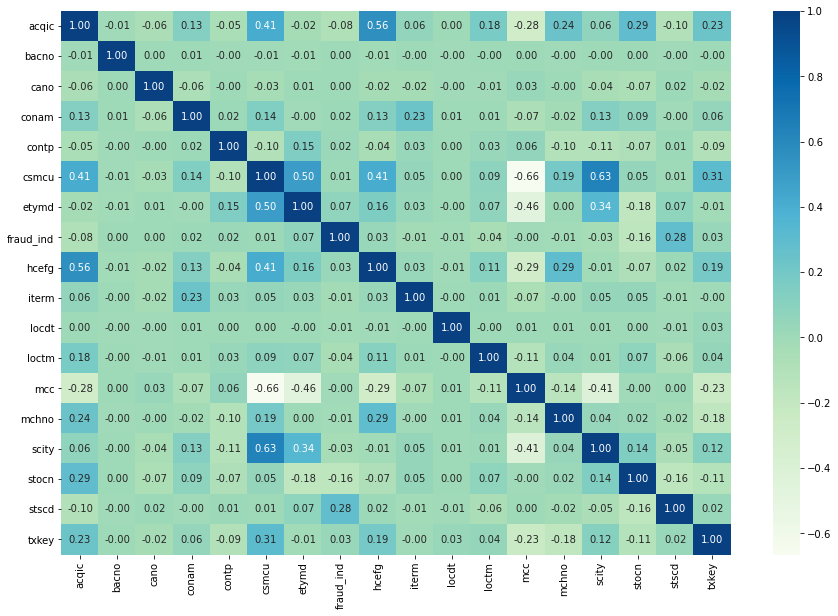

In [34]:
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr,cmap="GnBu",annot=True, fmt=".2f")
plt.show()

In [35]:
df['fraud_ind'].value_counts()

0    1501432
1      20355
Name: fraud_ind, dtype: int64

In [36]:
testdf['fraud_ind'].value_counts()

0    375375
1      5072
Name: fraud_ind, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
df[['ecfg']]=df[['ecfg']].apply(LabelEncoder().fit_transform)
df[['flbmk']]=df[['flbmk']].apply(LabelEncoder().fit_transform)
df[['flg_3dsmk']]=df[['flg_3dsmk']].apply(LabelEncoder().fit_transform)
df[['insfg']]=df[['insfg']].apply(LabelEncoder().fit_transform)
df[['ovrlt']]=df[['ovrlt']].apply(LabelEncoder().fit_transform)

In [38]:
from sklearn.preprocessing import LabelEncoder
testdf[['ecfg']]=testdf[['ecfg']].apply(LabelEncoder().fit_transform)
testdf[['flbmk']]=testdf[['flbmk']].apply(LabelEncoder().fit_transform)
testdf[['flg_3dsmk']]=testdf[['flg_3dsmk']].apply(LabelEncoder().fit_transform)
testdf[['insfg']]=testdf[['insfg']].apply(LabelEncoder().fit_transform)
testdf[['ovrlt']]=testdf[['ovrlt']].apply(LabelEncoder().fit_transform)

In [39]:
df.keys()

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg', 'iterm', 'locdt',
       'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey'],
      dtype='object')

In [40]:
df

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0,0,...,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0,0,...,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0,0,...,0,6,152458.0,457,59333,0,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,0,5,0,0,...,0,5,172946.0,247,50436,0,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,0,4,0,0,...,0,6,182129.0,263,93775,0,5817,102,0,1051004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,1,8,0,0,...,0,4,191642.0,209,38222,0,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,1,8,0,0,...,0,13,102338.0,192,90135,0,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,1,8,0,0,...,0,29,234618.0,373,79246,0,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,1,2,0,0,...,0,24,215218.0,373,79246,0,5817,102,0,338215


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B28877D278>,
      dtype=object)

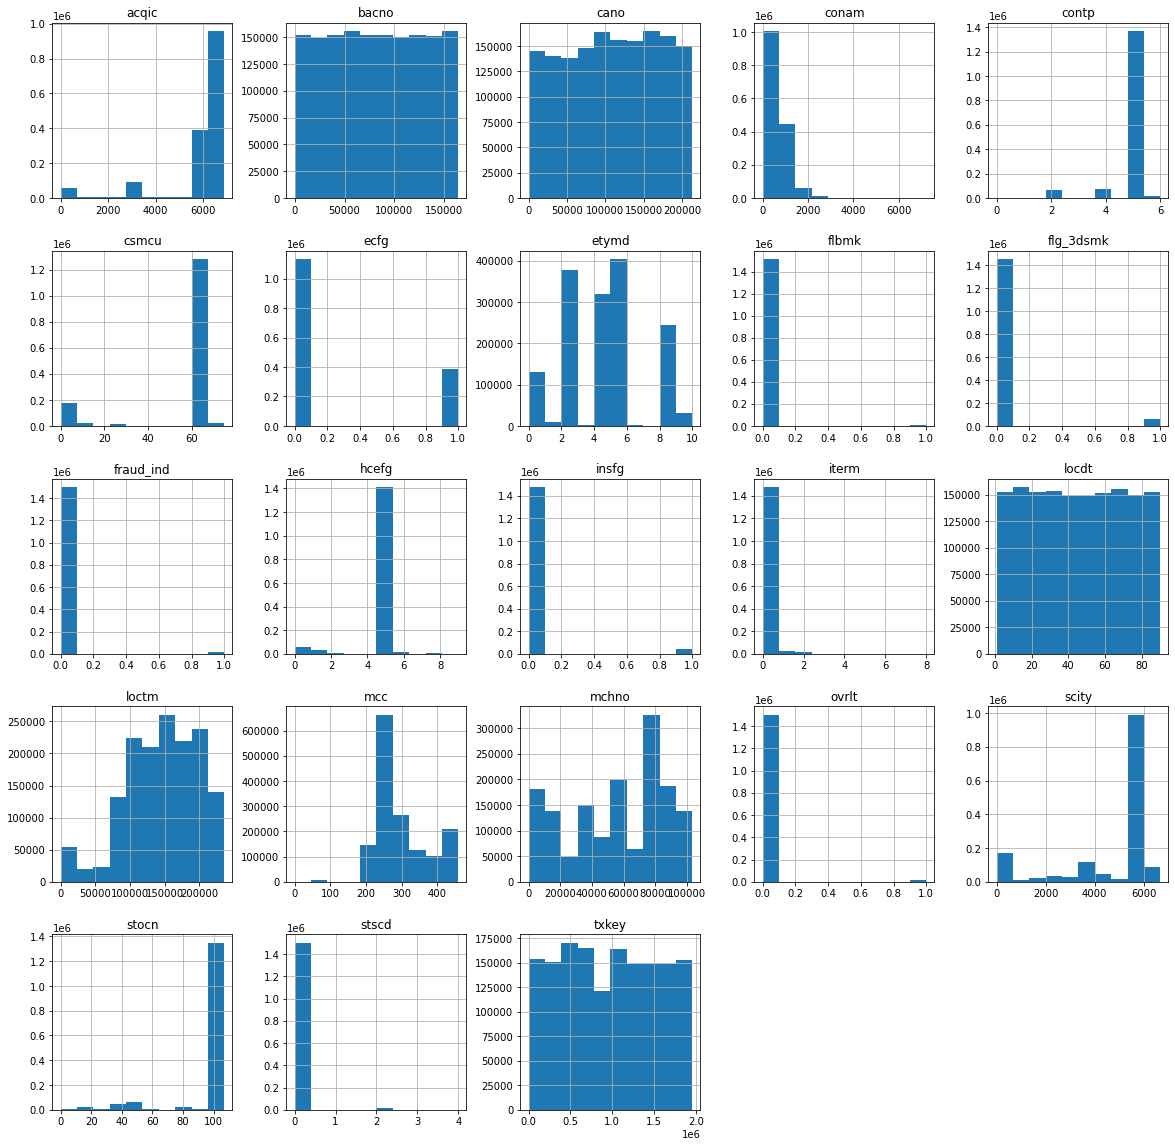

In [41]:
df.hist(figsize=(20,20))

In [42]:
df1=df.values
df2=testdf.values
#X= np.hstack((df1[:,:10],df1[:,11:]))
#y = df1[:,10]

In [43]:
X_train = np.hstack((df1[:,:10],df1[:,11:]))
X_test = np.hstack((df2[:,:10],df2[:,11:]))
y_train = df1[:,10]
y_test = df2[:,10]
#train_test_split(X ,y,stratify = y,test_size = 0.2, random_state=10)


In [21]:
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier(max_depth=10)
tree.fit(X_train,y_train)
print('tree.score:',tree.score(X_test,y_test))
tree_predictions = tree.predict(X_test)
print(confusion_matrix(y_test,tree_predictions))
print('\n')
print(classification_report(y_test,tree_predictions))
scores = cross_val_score(tree,X_train,y_train,cv=5,scoring='accuracy')
print("cross_val_score:",scores)
print("cross_val_score mean:",scores.mean())

tree.score: 0.9916545537223319
[[374798    577]
 [  2598   2474]]


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    375375
         1.0       0.81      0.49      0.61      5072

    accuracy                           0.99    380447
   macro avg       0.90      0.74      0.80    380447
weighted avg       0.99      0.99      0.99    380447

cross_val_score: [0.99067874 0.99078059 0.99064585 0.99087256 0.99024172]
cross_val_score mean: 0.9906438942036268


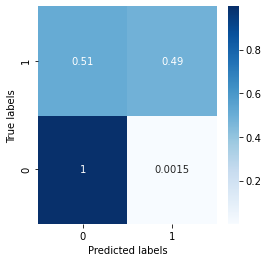

In [23]:
import seaborn as sns
con_mat = confusion_matrix(y_test, tree_predictions)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=5)
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

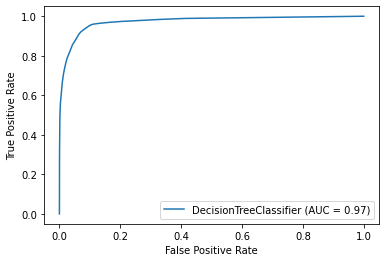

In [33]:
from sklearn.metrics import plot_roc_curve
tree_disp = plot_roc_curve(tree, X_test, y_test)
plt.show()

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(tree, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  2.1min finished

[2021-06-05 12:46:31] Features: 1/10 -- score: 0.9881856002195233[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  5.1min finished

[2021-06-05 12:51:38] Features: 2/10 -- score: 0.988830237050267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.5min finished

[2021-06-05 12:58:08] Features: 3/10 -- score: 0.9896444113816703[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [35]:
sfs1.k_feature_idx_

(1, 2, 3, 5, 7, 13, 15, 16, 18, 20)

In [36]:
import pandas as pd
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(16,)","[0.9882539640817721, 0.9881159686947608, 0.988...",0.988186,"(16,)",9.35707e-05,7.28012e-05,3.64006e-05
2,"(3, 16)","[0.9889570834346395, 0.9887533759585752, 0.988...",0.98883,"(3, 16)",0.000113872,8.85963e-05,4.42981e-05
3,"(3, 16, 20)","[0.9897489141077284, 0.9896766308097701, 0.989...",0.989644,"(3, 16, 20)",0.000131844,0.000102579,5.12896e-05
4,"(3, 16, 18, 20)","[0.9896766308097701, 0.9900479041129197, 0.989...",0.989826,"(3, 16, 18, 20)",0.000182885,0.000142291,7.11456e-05
5,"(2, 3, 16, 18, 20)","[0.9901891851043837, 0.9904651758784063, 0.990...",0.990282,"(2, 3, 16, 18, 20)",0.000149487,0.000116306,5.81531e-05
6,"(2, 3, 13, 16, 18, 20)","[0.9904093206027113, 0.9906031712654177, 0.990...",0.990377,"(2, 3, 13, 16, 18, 20)",0.000245109,0.000190703,9.53516e-05
7,"(2, 3, 5, 13, 16, 18, 20)","[0.9906064568698704, 0.9907575946746923, 0.990...",0.990539,"(2, 3, 5, 13, 16, 18, 20)",0.000288505,0.000224467,0.000112234
8,"(2, 3, 5, 13, 15, 16, 18, 20)","[0.9906360273099442, 0.9908857332483457, 0.990...",0.99061,"(2, 3, 5, 13, 15, 16, 18, 20)",0.000248851,0.000193614,9.68072e-05
9,"(2, 3, 5, 7, 13, 15, 16, 18, 20)","[0.990695168190092, 0.9908857332483457, 0.9908...",0.990691,"(2, 3, 5, 7, 13, 15, 16, 18, 20)",0.000199585,0.000155284,7.76418e-05
10,"(1, 2, 3, 5, 7, 13, 15, 16, 18, 20)","[0.9906655977500181, 0.9908331635771033, 0.990...",0.99076,"(1, 2, 3, 5, 7, 13, 15, 16, 18, 20)",0.000156251,0.000121568,6.07842e-05


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  2.1min finished

[2021-06-05 14:02:29] Features: 1/10 -- score: 0.9881856002195233[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  5.1min finished

[2021-06-05 14:07:37] Features: 2/10 -- score: 0.9888269514350192[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.5min finished

[2021-06-05 14:14:09] Features: 3/10 -- score: 0.9896424400146806[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

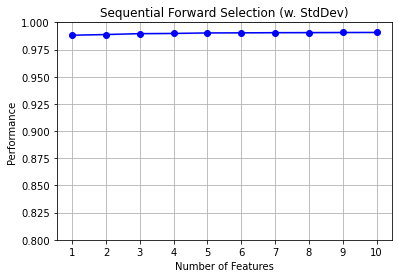

In [37]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs = SFS(tree, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [38]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]

X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
tree.fit(X_train_sfs, y_train)
y_pred = tree.predict(X_test_sfs)

# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('val set accuracy: %.2f %%' % (acc * 100))

val set accuracy: 99.17 %


In [18]:
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier(max_depth=10)
tree.fit(X_train[:,[2,3,5,7,13,15,16,18,20]],y_train)
print('tree.score:',tree.score(X_test[:,[2,3,5,7,13,15,16,18,20]],y_test))
tree_predictions = tree.predict(X_test[:,[2,3,5,7,13,15,16,18,20]])
print(confusion_matrix(y_test,tree_predictions))
print('\n')
print(classification_report(y_test,tree_predictions))

tree.score: 0.9916124979300664
[[374915    460]
 [  2731   2341]]


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    375375
         1.0       0.84      0.46      0.59      5072

    accuracy                           0.99    380447
   macro avg       0.91      0.73      0.80    380447
weighted avg       0.99      0.99      0.99    380447



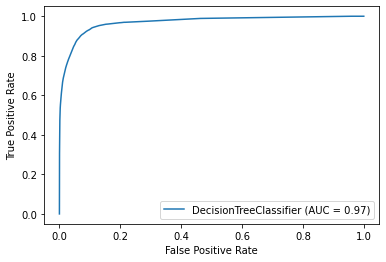

In [19]:
from sklearn.metrics import plot_roc_curve
tree_disp = plot_roc_curve(tree, X_test[:,[2,3,5,7,13,15,16,18,20]], y_test)
plt.show()

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu',alpha=1e-5,hidden_layer_sizes=(1000,1000),max_iter=300)
mlp.fit(X_train, y_train)
print('mlp.score:',mlp.score(X_val,y_val))
mlp_predictions = mlp.predict(X_val)
print(confusion_matrix(y_val,mlp_predictions))
print('\n')
print(classification_report(y_val,mlp_predictions))

mlp.score: 0.9866243042732572
[[300287      0]
 [  4071      0]]




C:\Users\10411\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    300287
         1.0       0.00      0.00      0.00      4071

    accuracy                           0.99    304358
   macro avg       0.49      0.50      0.50    304358
weighted avg       0.97      0.99      0.98    304358



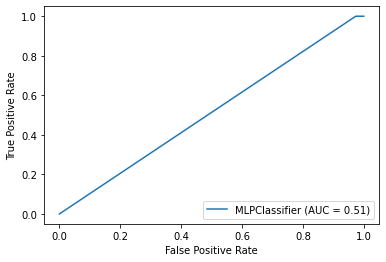

In [31]:
from sklearn.metrics import plot_roc_curve
mlp_disp = plot_roc_curve(mlp, X_val, y_val)
plt.show()

In [20]:
df1=df.values
df2=testdf.values
X_train = np.hstack((df1[:,:10],df1[:,11:]))
X_test = np.hstack((df2[:,:10],df2[:,11:]))
y_train = df1[:,10]
y_test = df2[:,10]
#train_test_split(X ,y,stratify = y,test_size = 0.2, random_state=10)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
log = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', class_weight='balanced').fit(X_train, y_train)
print("log.score",log.score(X_test,y_test))
log_predictions = log.predict(X_test)
print(confusion_matrix(y_test,log_predictions))
print('\n')
print(classification_report(y_test,log_predictions))
scores = cross_val_score(log,X_train,y_train,cv=5,scoring='accuracy')
print("cross_val_score:",scores)
print("cross_val_score mean:",scores.mean())

C:\Users\10411\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


log.score 0.6789013975665468
[[254439 120936]
 [  1225   3847]]


              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81    375375
         1.0       0.03      0.76      0.06      5072

    accuracy                           0.68    380447
   macro avg       0.51      0.72      0.43    380447
weighted avg       0.98      0.68      0.80    380447



C:\Users\10411\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\10411\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

cross_val_score: [0.67807648 0.67724522 0.67859783 0.67807542 0.66889541]
cross_val_score mean: 0.6761780702781973


C:\Users\10411\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


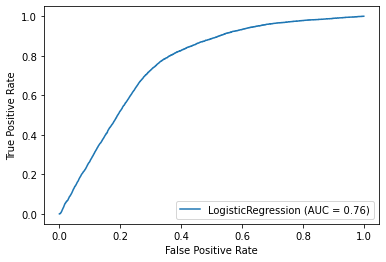

In [22]:
from sklearn.metrics import plot_roc_curve
log_disp = plot_roc_curve(log, X_test, y_test)
plt.show()

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs2 = SFS(log, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs2 = sfs2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  2.1min finished

[2021-06-05 15:28:36] Features: 1/10 -- score: 0.9866196780456352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  3.8min finished

[2021-06-05 15:32:22] Features: 2/10 -- score: 0.9866196780456352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.9min finished

[2021-06-05 15:36:18] Features: 3/10 -- score: 0.9815710085107103[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [27]:
sfs2.k_feature_idx_
import pandas as pd
pd.DataFrame.from_dict(sfs2.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(15,)","[0.9866210186688045, 0.9866243042732572, 0.986...",0.98662,"(15,)",6.334e-06,4.92807e-06,2.46403e-06
2,"(8, 15)","[0.9866210186688045, 0.9866243042732572, 0.986...",0.98662,"(8, 15)",6.334e-06,4.92807e-06,2.46403e-06
3,"(8, 15, 20)","[0.9811800576952142, 0.98163347110968, 0.98163...",0.981571,"(8, 15, 20)",0.000349861,0.000272204,0.000136102
4,"(8, 11, 15, 20)","[0.9811866289041195, 0.9816400423185854, 0.981...",0.981579,"(8, 11, 15, 20)",0.000350682,0.000272842,0.000136421
5,"(8, 9, 11, 15, 20)","[0.9811899145085722, 0.9816400423185854, 0.981...",0.981582,"(8, 9, 11, 15, 20)",0.00034867,0.000271277,0.000135639
6,"(8, 9, 11, 12, 15, 20)","[0.9811899145085722, 0.9816400423185854, 0.981...",0.981582,"(8, 9, 11, 12, 15, 20)",0.000348181,0.000270896,0.000135448
7,"(8, 9, 11, 12, 13, 15, 20)","[0.9811899145085722, 0.9816400423185854, 0.981...",0.981582,"(8, 9, 11, 12, 13, 15, 20)",0.000348181,0.000270896,0.000135448
8,"(8, 9, 11, 12, 13, 15, 18, 20)","[0.9811899145085722, 0.9814001931935418, 0.980...",0.981371,"(8, 9, 11, 12, 13, 15, 18, 20)",0.000498648,0.000387965,0.000193982
9,"(8, 9, 11, 12, 13, 15, 17, 18, 20)","[0.9699662896983158, 0.9812786258287938, 0.969...",0.974644,"(8, 9, 11, 12, 13, 15, 17, 18, 20)",0.00684176,0.00532312,0.00266156
10,"(4, 8, 9, 11, 12, 13, 15, 17, 18, 20)","[0.9544023814061073, 0.9510576360733084, 0.943...",0.954742,"(4, 8, 9, 11, 12, 13, 15, 17, 18, 20)",0.00989355,0.00769752,0.00384876


In [28]:
log.fit(X_train[:,[8,15]],y_train)
print('log.score:',log.score(X_test[:,[8,15]],y_test))
log_predictions = log.predict(X_test[:,[8,15]])
print(confusion_matrix(y_test,log_predictions))
print('\n')
print(classification_report(y_test,log_predictions))

log.score: 0.9866577999037974
[[375371      4]
 [  5072      0]]


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    375375
         1.0       0.00      0.00      0.00      5072

    accuracy                           0.99    380447
   macro avg       0.49      0.50      0.50    380447
weighted avg       0.97      0.99      0.98    380447



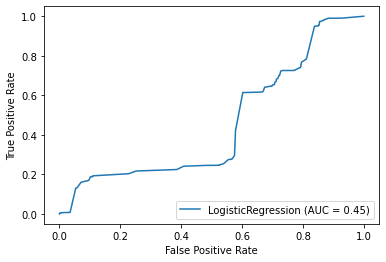

In [29]:
from sklearn.metrics import plot_roc_curve
log_disp = plot_roc_curve(log, X_test[:,[8,15]], y_test)
plt.show()

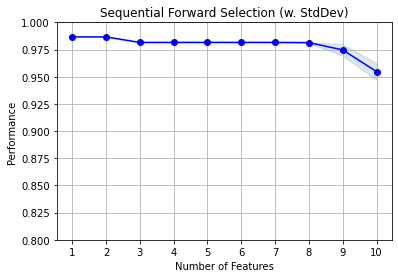

In [30]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#sfs = SFS(tree, 
#          k_features=10, 
#          forward=True, 
#          floating=False, 
#          scoring='accuracy',
#          verbose=2,
#          cv=5)

#sfs = sfs.fit(X_train, y_train)

fig2 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [32]:
df1=df.values
df2=testdf.values
X_train = np.hstack((df1[:,:10],df1[:,11:]))
X_test = np.hstack((df2[:,:10],df2[:,11:]))
y_train = df1[:,10]
y_test = df2[:,10]
#train_test_split(X ,y,stratify = y,test_size = 0.2, random_state=10)


In [44]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(n_estimators=100, learning_rate= 0.3, max_depth=6, 
        subsample=1, gamma=0, reg_lambda=1,  max_delta_step=0,
        colsample_bytree=1, min_child_weight=1, seed=1000 )
xgb.fit(X_train,y_train,eval_metric='auc')
xgb.score(X_test, y_test)
print("xgb.score",xgb.score(X_test,y_test))
xgb_predictions = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_predictions))
print('\n')
print(classification_report(y_test,xgb_predictions))
#scores = cross_val_score(xgb,X,y,cv=LeaveOneOut(),scoring='accuracy')
#print("cross_val_score:",scores)
#print("cross_val_score mean:",scores.mean())

C:\Users\10411\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


xgb.score 0.9933236429778655
[[374997    378]
 [  2162   2910]]


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    375375
         1.0       0.89      0.57      0.70      5072

    accuracy                           0.99    380447
   macro avg       0.94      0.79      0.85    380447
weighted avg       0.99      0.99      0.99    380447



In [45]:
xgb_predictions

array([0., 0., 0., ..., 0., 0., 0.])

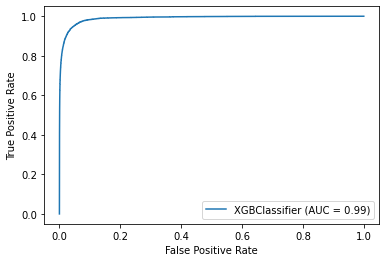

In [46]:
from sklearn.metrics import plot_roc_curve
xgb_disp = plot_roc_curve(xgb, X_test, y_test)
plt.show()

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs7 = SFS(xgb, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs7 = sfs7.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\10411\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
C:\Users\10411\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\10411\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\10411\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\10411\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\10411\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
import pandas as pd
pd.DataFrame.from_dict(sfs7.get_metric_dict()).T

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#sfs = SFS(xgb, 
#          k_features=5, 
#          forward=True, 
#          floating=False, 
#          scoring='accuracy',
#          verbose=2,
#          cv=5)

#sfs7 = sfs.fit(X_train, y_train)

fig7 = plot_sfs(sfs7.get_metric_dict(), kind='std_dev')

plt.ylim([0.9, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import LeaveOneOut
xgb = XGBClassifier(n_estimators=100, learning_rate= 0.3, max_depth=6, 
        subsample=1, gamma=0, reg_lambda=1,  max_delta_step=0,
        colsample_bytree=1, min_child_weight=1, seed=1000 )
xgb.fit(X_train[:, [1,2,3,6,13,16,18,19,20]],y_train,eval_metric='auc')
print('xgb.score',xgb.score(X_test[:, [1,2,3,6,13,16,18,19,20]], y_test))
xgb_predictions = xgb.predict(X_test[:, [1,2,3,6,13,16,18,19,20]])
print(confusion_matrix(y_test,xgb_predictions))
print('\n')
print(classification_report(y_test,xgb_predictions))


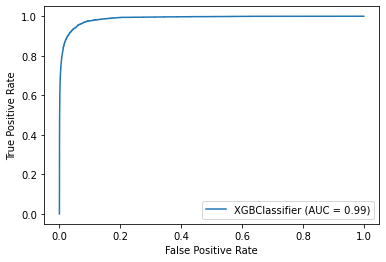

In [28]:
from sklearn.metrics import plot_roc_curve
xgb_disp = plot_roc_curve(xgb, X_test[:, [1,2,3,6,13,16,18,19,20]], y_test)
plt.show()

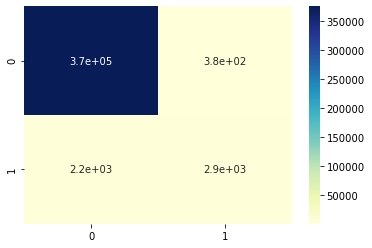

In [21]:
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,xgb_predictions)
sns.heatmap(confusion_matrix, annot=True,cmap ="YlGnBu" )
plt.show()

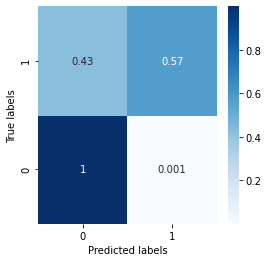

In [13]:
import seaborn as sns
con_mat = confusion_matrix(y_test, xgb_predictions)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=5)
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()